In [1]:
import yt
import h5py
import numpy as np
yt.utilities.logger.disable_stream_logging()

/data/data/com.termux/files/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f = h5py.File("kelly-denovo-forward.out.h5")
print(list(f.keys()))

['comp', 'denovo', 'metadata', 'model', 'physics-mg', 'source', 'system']


In [3]:
list(f["/system"].keys())

['configuration', 'db', 'peak_memory', 'runtime']

In [4]:
list(f["/model"].keys())

['input', 'log', 'peak_memory', 'properties', 'timers']

In [5]:
list(f["/metadata"].keys())

['datetime',
 'exnihilo_rev',
 'exnihilo_version',
 'name',
 'pid',
 'scale_rev',
 'scale_version',
 'system']

In [6]:
list(f["/denovo"].keys())

['block',
 'db',
 'diagnostics',
 'flux',
 'group_bounds_n',
 'log',
 'mesh_g',
 'mesh_x',
 'mesh_y',
 'mesh_z',
 'peak_memory',
 'properties',
 'quadrature_angles',
 'quadrature_weights',
 'silo_output',
 'source',
 'timers']

In [7]:
mesh_g = f["/denovo/mesh_g"][:]
mesh_x = f["/denovo/mesh_x"][:]
mesh_y = f["/denovo/mesh_y"][:]
mesh_z = f["/denovo/mesh_z"][:]

In [8]:
f["/denovo/flux"].shape

(27, 65, 50, 16)

In [9]:
flux = f["/denovo/flux"][:]
source = f["/denovo/source"][:]

In [10]:
flux.shape, source.shape

((27, 65, 50, 16), (27, 65, 50, 16))

In [11]:
mesh_g.shape, mesh_x.shape, mesh_y.shape, mesh_z.shape

((27,), (17,), (51,), (66,))

In [12]:
f["/denovo/group_bounds_n"][:], mesh_g

(array([2.0000e+07, 6.3763e+06, 3.0119e+06, 1.8268e+06, 1.4227e+06,
        9.0718e+05, 4.0762e+05, 1.1109e+05, 1.5034e+04, 3.0354e+03,
        5.8295e+02, 1.0130e+02, 2.9023e+01, 1.0677e+01, 3.0590e+00,
        1.8554e+00, 1.3000e+00, 1.1253e+00, 1.0000e+00, 8.0000e-01,
        4.1399e-01, 3.2500e-01, 2.2500e-01, 1.0000e-01, 5.0000e-02,
        3.0000e-02, 1.0000e-02, 1.0000e-05]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int32))

In [13]:
yt.load_hexahedral_mesh

<function yt.frontends.stream.data_structures.load_hexahedral_mesh>

In [14]:
coords, conn = yt.hexahedral_connectivity(mesh_x, mesh_y, mesh_z)

In [15]:
data = { 'group_%03i' % i : flux[i,...].transpose() for i in range(27)}
ds = yt.load_hexahedral_mesh(data, conn, coords, bbox = np.array([[mesh_x.min(), mesh_x.max()], [mesh_y.min(), mesh_y.max()], [mesh_z.min(), mesh_z.max()]]))


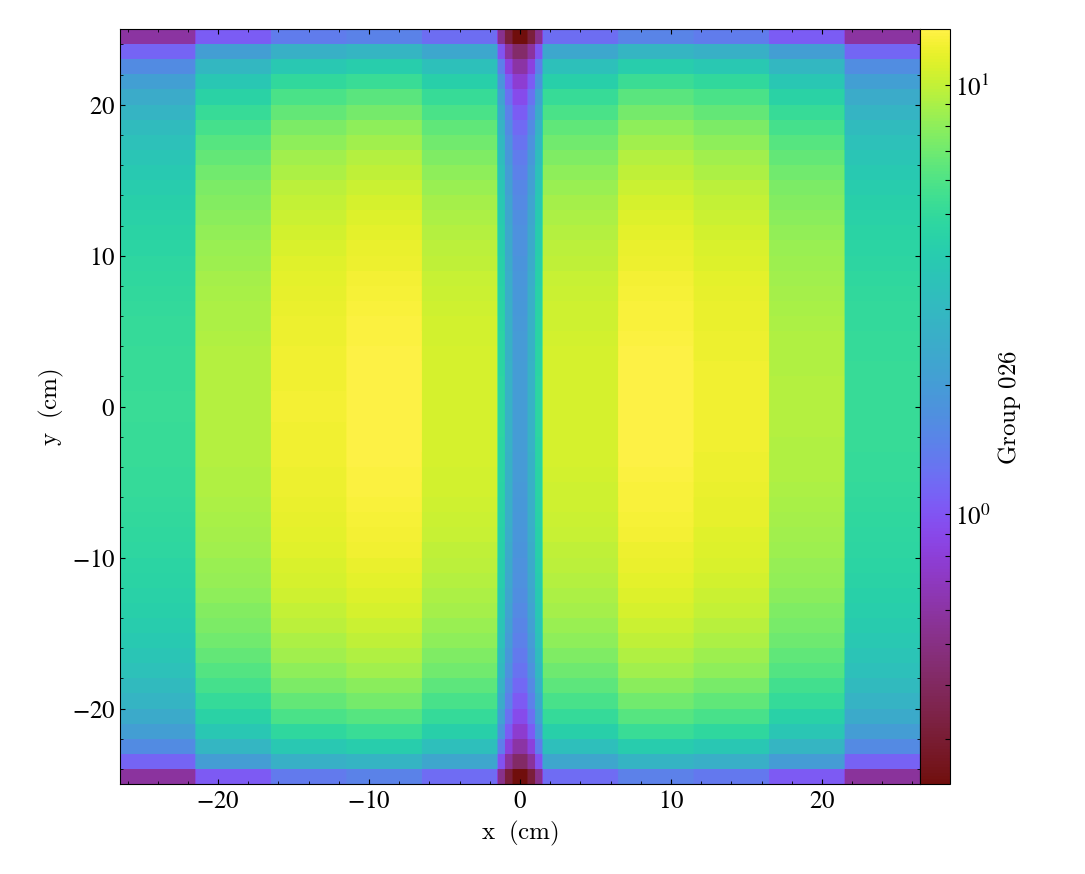

In [16]:
yt.SlicePlot(ds, "z", "group_026")

In [19]:
import ipywidgets

In [21]:
@ipywidgets.interact(group = (0, 27, 1))
def make_slice(group = 0):
    s = yt.SlicePlot(ds, "z", "group_%03i" % group)
    s.show()

interactive(children=(IntSlider(value=0, description='group', max=27), Output()), _dom_classes=('widget-interact',))